In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = './Chiron/'

#get number of examples per person
files = os.listdir(path)
files

['PersonJ.csv',
 'PersonH.csv',
 'PersonI.csv',
 'PersonB.csv',
 'PersonC.csv',
 'PersonA.csv',
 'PersonD.csv',
 'PersonE.csv',
 'PersonG.csv',
 'PersonF.csv']

### Get number of all raw examples in the dataset

* **examples** all examples
* **shimmers** only shimmer examples from single placement that can be divided by 50Hz to get a duration of the dataset in minutes

In [3]:
examples = []
shimmers = []
for file in files:
    dataset = pd.read_csv(path+file, low_memory=False)
    dataset = dataset.drop(dataset.columns[0], axis=1)
    examples.append(dataset.shape[0])
    shimmerdata = dataset[(dataset.DeviceID == "Shimmer") & (dataset.Placement == "WRIST")]
    shimmers.append(shimmerdata.shape[0])

In [4]:
print("Number of all raw examples:",np.sum(examples))
print("Number of all shimmer examples:",np.sum(shimmers))

Number of all raw examples: 15015378
Number of all shimmer examples: 3361966


In [5]:
print("Duration:",np.sum(shimmers)/(50*60), "min")
print("Duration:",np.sum(shimmers)/(50*60*60), "hours")

Duration: 1120.65533333 min
Duration: 18.6775888889 hours


In [6]:
for shimmer in shimmers:
    print("Duration:",shimmer/(50*60*60), "hours")

Duration: 1.6815666666666667 hours
Duration: 1.4828666666666668 hours
Duration: 1.910738888888889 hours
Duration: 1.8299944444444445 hours
Duration: 1.9700444444444445 hours
Duration: 1.9789611111111112 hours
Duration: 1.886738888888889 hours
Duration: 1.9984055555555555 hours
Duration: 1.9630888888888889 hours
Duration: 1.9751833333333333 hours


### Frequency

In [7]:
df = pd.read_csv(path+files[0], index_col=0, parse_dates=[2])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
ankle_data = df.loc[df.Placement=='ANKLE']
wrist_data = df.loc[df.Placement=='WRIST']
chest_data = df.loc[df.Placement=='CHEST']
thigh_data = df.loc[df.Placement=='THIGH']

ankle_data = ankle_data.set_index(pd.DatetimeIndex(ankle_data.Time))
wrist_data = wrist_data.set_index(pd.DatetimeIndex(wrist_data.Time))
chest_data = chest_data.set_index(pd.DatetimeIndex(chest_data.Time))
thigh_data = thigh_data.set_index(pd.DatetimeIndex(thigh_data.Time))

In [9]:
ankle_freq = ankle_data.DeviceID.groupby(pd.TimeGrouper(freq='1S')).count().tolist()
wrist_freq = wrist_data.DeviceID.groupby(pd.TimeGrouper(freq='1S')).count().tolist()
chest_freq = chest_data.DeviceID.groupby(pd.TimeGrouper(freq='1S')).count().tolist()
thigh_freq = thigh_data.DeviceID.groupby(pd.TimeGrouper(freq='1S')).count().tolist()

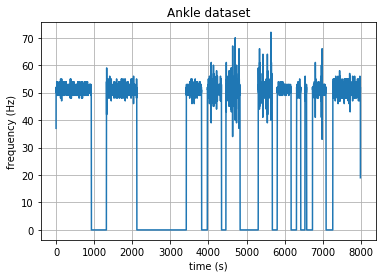

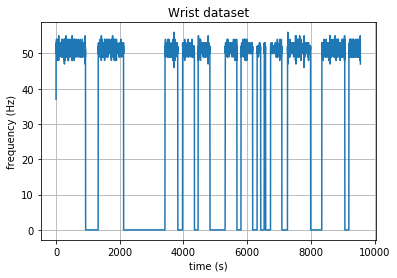

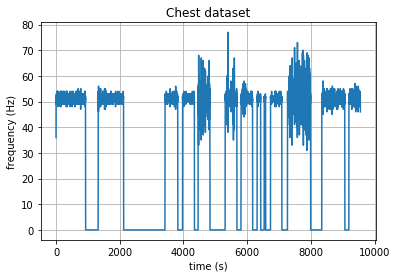

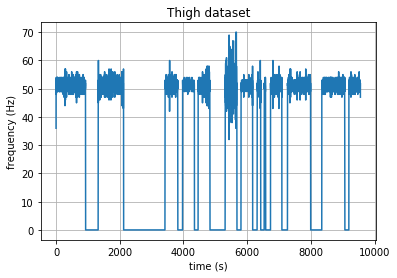

In [10]:
fig, ax = plt.subplots()
ax.plot(range(0, len(ankle_freq)), ankle_freq)
ax.set(xlabel='time (s)', ylabel='frequency (Hz)',
       title='Ankle dataset')
ax.grid()

fig1, ax1 = plt.subplots()
ax1.plot(range(0, len(wrist_freq)), wrist_freq)
ax1.set(xlabel='time (s)', ylabel='frequency (Hz)',
       title='Wrist dataset')
ax1.grid()

fig2, ax2 = plt.subplots()
ax2.plot(range(0, len(chest_freq)), chest_freq)
ax2.set(xlabel='time (s)', ylabel='frequency (Hz)',
       title='Chest dataset')
ax2.grid()

fig3, ax3 = plt.subplots()
ax3.plot(range(0, len(thigh_freq)), thigh_freq)
ax3.set(xlabel='time (s)', ylabel='frequency (Hz)',
       title='Thigh dataset')
ax3.grid()

plt.show()